# Linear Regression with Python
## Boston Housing data

R data sets can be found at [this link](http://vincentarelbundock.github.io/Rdatasets/datasets.html).

This notebook will use the Boston Housing data.

In [9]:
### load the data
import pandas as pd
df = pd.read_csv('data/Boston.csv')
print(df.head())
print('\nDimensions of data frame:', df.shape)
print('\nDescribe rm and medv:\n', df.loc[:, ['rm', 'medv']].describe())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Dimensions of data frame: (506, 14)

Describe rm and medv:
                rm        medv
count  506.000000  506.000000
mean     6.284634   22.532806
std      0.702617    9.197104
min      3.561000    5.000000
25%      5.885500   17.025000
50%      6.208500   21.200000
75%      6.623500   25.000000
max      8.780000   50.000000


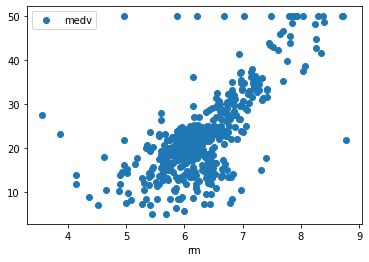

In [10]:
import seaborn as sb

df.plot(x='rm', y='medv', style='o')

In [11]:
# train test split
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:12]
y = df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (404, 12)
test size: (102, 12)


In [12]:
# train the algorithm
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# retrieve coefficients
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: 30.624329853887346
coefficients: [-1.36882736e-01  5.01195076e-02 -5.31993757e-03  3.05159600e+00
 -2.42314897e+01  5.26728460e+00 -5.36462287e-02 -1.92623793e+00
  3.12273136e-01 -1.34360741e-02 -1.08579685e+00  1.51861732e-02]


In [14]:
# make predictions

y_pred = linreg.predict(X_test)

In [15]:
# evaluation
from sklearn.metrics import mean_squared_error, r2_score
print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))

mse= 27.442176730255614
correlation= 0.7326596279331063


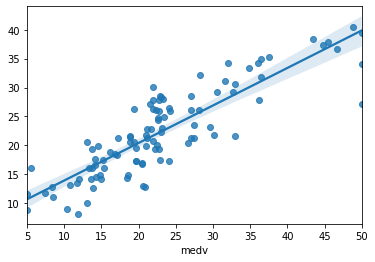

In [16]:
# plot correlation

sb.regplot(x=y_test, y=y_pred)